### Задачи
- обход в глубину
- обход в ширину
- поиск минимума, максимума
- поиск предыдущего, следующего
- поиск высоты: рекурсивно, стеком, кешами
- АВЛ: пересчет кеша высоты, вставка, удаление
- АВЛ: левое/правое большое/малое вращение
- обращение по индексу, размер поддерева (и пересчет кеша)
- разрезание, склеивание
- полный пересчет кешей и проверка корректности

In [1]:
%matplotlib inline
from IPython.display import Image, HTML
import networkx as nx

In [2]:
class Node:
    def __init__(self, num=None):
        self.key = self.num = num
        self.left = self.right = None

    def __repr__(self):
        return '["{}" {},{}]'.format(
            self.key,
            '.' if self.left is None else self.left.key,
            '.' if self.right is None else self.right.key,
        )


def read_graph(nodes):
    if isinstance(nodes, str):
        nodes = nodes.split(';')
    graph = [Node() for _ in range(len(nodes))]
    for num, node in enumerate(nodes):
        if isinstance(node, str):
            key, left, right = map(int, node.strip().split())
        graph[num].num = num
        graph[num].key = key
        if left != -1:
            graph[num].left = graph[left]
        if right != -1:
            graph[num].right = graph[right]
    return graph[0]


def draw_tree(tree, root=0,
              width=.05, vgap=.05, vloc=0, xcenter=.5,
              node_color='lightgray', node_size=600,
              **kw):
    graph = nx.Graph()
    labels = {}
    def add_node(node):
        num = node.num
        if num not in graph.nodes:
            graph.add_node(num)
            labels[num] = node.key
        if node.left is not None:
            add_node(node.left)
            graph.add_edge(num, node.left.num)
        if node.right is not None:
            add_node(node.right)
            graph.add_edge(num, node.right.num)
    add_node(tree)

    def layout_hier(root, width, vloc, xcenter, pos=None, parent=None):
        if pos is None:
            pos = { root: (xcenter, vloc) }
        else:
            pos[root] = (xcenter, vloc)
        neighbors = list(graph.neighbors(root))
        if parent is not None:
            neighbors.remove(parent)
        if len(neighbors):
            dx = width / len(neighbors) 
            nextx = xcenter - width/2 - dx/2
            for neighbor in neighbors:
                nextx += dx
                pos = layout_hier(neighbor, width=dx, vloc=vloc-vgap, xcenter=nextx,
                                  pos=pos, parent=root)
        return pos

    pos = layout_hier(root, width, vloc, xcenter)
    return nx.draw(graph, pos=pos, with_labels=True, labels=labels,
                   node_color=node_color, node_size=node_size,
                   **kw)

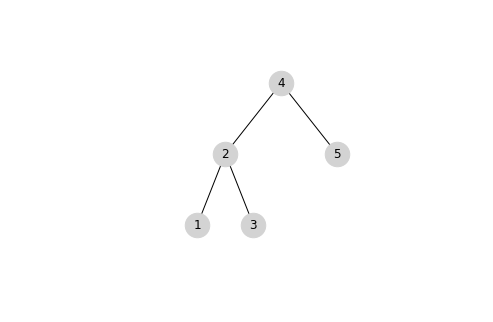

In [5]:
tree = read_graph('0 7 2;10 -1 -1;20 -1 6;30 8 9;40 3 -1;50 -1 -1;60 1 -1;70 5 4;80 -1 -1;90 -1 -1')